In [8]:
#imports 
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt


In [3]:
basket = pd.read_csv('/Users/cicerosantos/Documents/GitHub/MLII/data/raw/customer_basket.csv')
customer_info = pd.read_csv('/Users/cicerosantos/Documents/GitHub/MLII/data/raw/customer_info.csv', index_col = 'customer_id')
product = pd.read_excel('/Users/cicerosantos/Documents/GitHub/MLII/data/raw/product_mapping.xlsx')



In [56]:
basket.head()

,invoice_id,list_of_goods,customer_id
0,7448187,"['olive oil', 'yogurt cake', 'grated cheese', ...",43134
1,3167314,"['babies food', 'shower gel', 'rice', 'black b...",43134
2,10199712,"['babies food', 'barbecue sauce', 'olive oil',...",43134
3,12179179,"['babies food', 'milk', 'rice', 'yogurt cake',...",43134
4,8292388,"['napkins', 'cookies', 'razor', 'cooking oil',...",43134


In [4]:
#o vic já fez o codigo q faz o mapa e troca latitude e lontitude por location 
customer_info.sort_index(inplace = True)

customer_info.head(
)

,Unnamed: 0,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
1,34467,Msc. Kathleen Carmichael,female,12/15/1976 01:11 PM,1.0,1.0,0.0,1.0,2795.0,169.0,...,1.0,697.0,314.0,486.0,165.0,0.320103,2011.0,992355.0,38.761431,-9.159156
2,6879,Msc. Betty Smith,female,06/30/1968 08:12 AM,1.0,0.0,0.0,NaN,4123.0,730.0,...,2.0,533.0,123.0,334.0,347.0,0.360180,2006.0,965662.0,38.717322,-9.147364
3,30542,Bsc. Crystal Kitchens,female,03/01/1958 01:09 PM,1.0,1.0,0.0,1.0,16197.0,8942.0,...,4333.0,2543.0,3942.0,3309.0,152.0,0.181410,2009.0,991163.0,38.760632,-9.167537
4,42496,Msc. Glenda Bauman,female,06/30/1984 04:57 PM,1.0,1.0,1.0,3.0,3836.0,403.0,...,253.0,102.0,605.0,306.0,4.0,0.025726,2009.0,902456.0,38.728994,-9.173723
5,8388,Bsc. Antonio Campbell,male,12/26/1992 06:19 AM,1.0,2.0,1.0,3.0,5401.0,3246.0,...,1817.0,1845.0,1003.0,1778.0,1318.0,0.084791,2013.0,917096.0,38.777216,-9.157392


### **ideias no preprocessing :** 
* Tirar os binarios porque pode dificultar o algoritmo ?
* mudar os anos da year first transaction para talves uma continuos variable, ou anos como costumers ?
* mudar os nomes tipo mudar todos lifetimes para total distinct produrcs, spend video games etc 
* mudas os customer para id, name , gender, birthdate 
* É preciso alguma transformação na typical hour ?




In [58]:
product.head()

,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks


# **Refactoring**

In [59]:
refactored_columns = {col: col.replace('lifetime_', '') if col.startswith('lifetime_') else col for col in customer_info.columns}

customer_info.rename(columns=refactored_columns, inplace=True)

In [60]:
refactored_columns = {col: col.replace('customer_', '') if col.startswith('customer_') else col for col in customer_info.columns}


customer_info.rename(columns=refactored_columns, inplace=True)

In [63]:
customer_info.drop('Unnamed: 0', axis= 1,inplace = True)

In [65]:
customer_info

,name,gender,birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,spend_groceries,spend_electronics,typical_hour,...,spend_fish,spend_hygiene,spend_videogames,spend_petfood,total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Msc. Kathleen Carmichael,female,12/15/1976 01:11 PM,1.0,1.0,0.0,1.0,2795.0,169.0,9.0,...,1.0,697.0,314.0,486.0,165.0,0.320103,2011.0,992355.0,38.761431,-9.159156
2,Msc. Betty Smith,female,06/30/1968 08:12 AM,1.0,0.0,0.0,NaN,4123.0,730.0,14.0,...,2.0,533.0,123.0,334.0,347.0,0.360180,2006.0,965662.0,38.717322,-9.147364
3,Bsc. Crystal Kitchens,female,03/01/1958 01:09 PM,1.0,1.0,0.0,1.0,16197.0,8942.0,16.0,...,4333.0,2543.0,3942.0,3309.0,152.0,0.181410,2009.0,991163.0,38.760632,-9.167537
4,Msc. Glenda Bauman,female,06/30/1984 04:57 PM,1.0,1.0,1.0,3.0,3836.0,403.0,17.0,...,253.0,102.0,605.0,306.0,4.0,0.025726,2009.0,902456.0,38.728994,-9.173723
5,Bsc. Antonio Campbell,male,12/26/1992 06:19 AM,1.0,2.0,1.0,3.0,5401.0,3246.0,8.0,...,1817.0,1845.0,1003.0,1778.0,1318.0,0.084791,2013.0,917096.0,38.777216,-9.157392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,Rosaura Polsgrove,female,02/19/1957 07:30 PM,0.0,0.0,0.0,1.0,4660.0,146.0,6.0,...,232.0,92.0,0.0,5132.0,87.0,0.080812,2015.0,NaN,38.754547,-9.192977
49997,Salvador Pedersen,male,09/04/1970 05:26 PM,4.0,0.0,1.0,1.0,6419.0,2827.0,NaN,...,1001.0,983.0,1318.0,1153.0,410.0,0.062217,2007.0,NaN,38.740483,-9.069564
49998,Kenneth Penney,male,07/14/1991 10:39 AM,0.0,0.0,0.0,1.0,6740.0,2939.0,11.0,...,733.0,766.0,765.0,868.0,726.0,0.315149,2016.0,NaN,38.736556,-9.149285


## **Missing Values and Data Types**

**Finding the missing values**

In [64]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 1 to 50000
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   name                                     43631 non-null  object 
 1   gender                                   43631 non-null  object 
 2   birthdate                                43631 non-null  object 
 3   kids_home                                43107 non-null  float64
 4   teens_home                               42610 non-null  float64
 5   number_complaints                        42977 non-null  float64
 6   distinct_stores_visited                  42322 non-null  float64
 7   spend_groceries                          43631 non-null  float64
 8   spend_electronics                        43631 non-null  float64
 9   typical_hour                             41886 non-null  float64
 10  spend_vegetables                         42758 non-

**colunas com missing values :** 
* teens_home 
* number_complaints
* distinct_stores_visited
* typical_hour
* spend vegetables
* spend fish

In [47]:
# Assuming df is your DataFrame
rows_with_missing_values = customer_info[customer_info.isnull().any(axis=1)]
print(rows_with_missing_values)


             Unnamed: 0                 name  gender            birthdate  \
customer_id                                                                 
39634                 0          David Frink    male  05/15/1964 10:34 PM   
43460                 1        Belinda Terry  female  03/26/1988 11:06 PM   
10090                 4        Lonnie Hopson    male  12/18/2001 03:03 AM   
24058                 5           Maria Hunt  female  02/21/1959 09:16 PM   
47768                 7         Alison Brown  female  11/28/1971 01:01 AM   
...                 ...                  ...     ...                  ...   
32758             43621  Carman Stubblefield  female  02/27/1978 07:10 PM   
46617             43623         Laura Julian  female  12/19/1965 01:10 AM   
38747             43624         Scott Thomas    male  05/17/1953 06:36 AM   
48487             43626      Amelia Crawford  female  08/28/1983 11:43 AM   
21373             43628        Addie Coronel  female  02/20/1994 05:58 AM   

In [52]:
# Calculate percentage of missing values in each column
missing_percentage_per_column = (customer_info.isnull().sum() / len(customer_info)) * 100

# Calculate percentage of missing values in the entire DataFrame
total_missing_percentage = (customer_info.isnull().sum().sum() / (customer_info.shape[0] * customer_info.shape[1])) * 100

print("Percentage of missing values in each column:")
print(missing_percentage_per_column)
print("\nPercentage of missing values in the entire DataFrame:", total_missing_percentage)


Percentage of missing values in each column:
Unnamed: 0                                  0.000000
name                                        0.000000
gender                                      0.000000
birthdate                                   0.000000
kids_home                                   1.200981
teens_home                                  2.340079
number_complaints                           1.498934
distinct_stores_visited                     3.000160
spend_groceries                             0.000000
spend_electronics                           0.000000
typical_hour                                3.999450
spend_vegetables                            2.000871
spend_nonalcohol_drinks                     0.000000
spend_alcohol_drinks                        0.000000
spend_meat                                  0.000000
spend_fish                                  3.000160
spend_hygiene                               0.000000
spend_videogames                            0.000000
s

### dealing with the missing values

# Distribution 

In [53]:
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43631.0,21815.000000,12595.329134,0.000000,10907.500000,21815.000000,32722.500000,43630.000000
kids_home,43107.0,1.081263,1.239257,0.000000,0.000000,1.000000,1.000000,9.000000
teens_home,42610.0,0.847829,0.840397,0.000000,0.000000,1.000000,1.000000,6.000000
number_complaints,42977.0,0.705726,0.624624,0.000000,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,42322.0,1.669959,1.034825,1.000000,1.000000,1.000000,2.000000,8.000000
spend_groceries,43631.0,5600.030047,4602.647746,0.000000,2184.500000,4071.000000,6605.500000,26552.000000
spend_electronics,43631.0,2000.058468,3004.924537,0.000000,218.000000,574.000000,2565.500000,21273.000000
typical_hour,41886.0,13.520580,4.558057,6.000000,10.000000,13.000000,17.000000,24.000000
spend_vegetables,42758.0,456.893938,312.832282,0.000000,227.000000,387.000000,584.000000,2112.000000
spend_nonalcohol_drinks,43631.0,443.636657,210.313287,0.000000,297.000000,419.000000,560.000000,2224.000000


# Feature engeneering

# Feature scalling

# Mapping costumers

In [5]:
# center the map at the mean coordinates
center_lat = customer_info['latitude'].mean()
center_long = customer_info['longitude'].mean()

m = folium.Map(location=[center_lat, center_long], zoom_start=6)

# due to the large number of points, we use a marker cluster
marker_cluster = MarkerCluster().add_to(m)

for idx, row in customer_info.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

In [6]:
def assign_city(lat, lon):
    # Define the boundaries of the cities (these are approximate and you may need to adjust them)
    if 38.6 <= lat <= 38.85 and -9.25 <= lon <= -9.05:
        return 'Lisbon'
    elif 39.3 <= lat <= 39.4 and -9.5 <= lon <= -9.3:
        return 'Peniche'
    elif 38.9 <= lat <= 39.0 and -9.5 <= lon <= -9.3:
        return 'Ericeira'
    else:
        return 'Other'

# Apply the function to your dataframe
infotest = customer_info.copy()
infotest['city'] = customer_info.apply(lambda row: assign_city(row['latitude'], row['longitude']), axis=1)

In [7]:
infotest.head()

,Unnamed: 0,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,city
customer_id,,,,,,,,,,,,,,,,,,,,,
1,34467,Msc. Kathleen Carmichael,female,12/15/1976 01:11 PM,1.0,1.0,0.0,1.0,2795.0,169.0,...,697.0,314.0,486.0,165.0,0.320103,2011.0,992355.0,38.761431,-9.159156,Lisbon
2,6879,Msc. Betty Smith,female,06/30/1968 08:12 AM,1.0,0.0,0.0,NaN,4123.0,730.0,...,533.0,123.0,334.0,347.0,0.360180,2006.0,965662.0,38.717322,-9.147364,Lisbon
3,30542,Bsc. Crystal Kitchens,female,03/01/1958 01:09 PM,1.0,1.0,0.0,1.0,16197.0,8942.0,...,2543.0,3942.0,3309.0,152.0,0.181410,2009.0,991163.0,38.760632,-9.167537,Lisbon
4,42496,Msc. Glenda Bauman,female,06/30/1984 04:57 PM,1.0,1.0,1.0,3.0,3836.0,403.0,...,102.0,605.0,306.0,4.0,0.025726,2009.0,902456.0,38.728994,-9.173723,Lisbon
5,8388,Bsc. Antonio Campbell,male,12/26/1992 06:19 AM,1.0,2.0,1.0,3.0,5401.0,3246.0,...,1845.0,1003.0,1778.0,1318.0,0.084791,2013.0,917096.0,38.777216,-9.157392,Lisbon


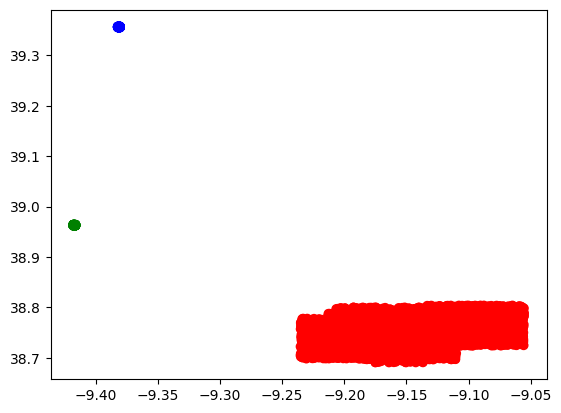

In [9]:
# Define a dictionary mapping city names to colors
color_dict = {'Lisbon': 'red', 'Peniche': 'blue', 'Ericeira': 'green', 'Other': 'gray'}

# Create a new column with colors based on the city
infotest['color'] = infotest['city'].map(color_dict)

# Create the scatter plot
plt.scatter(infotest['longitude'], infotest['latitude'], c=infotest['color'])
plt.show()